We assume that you've read tutorial1_corgisim.ipynb, which goes through the process of simulating coronagraph observations of an on-axis host star with off-axis companions. In tutorial1, an image is generated with the HLC coronagraph, which is used for narrow FOV imaging. This notebook demonstrates the wide FOV imaging mode with the SPC-wide (SPC_A) coronagraph, and what an image of the host star with a companion would look like. 

In [1]:
#import necessary packages
from corgisim import scene
from corgisim import instrument
import matplotlib.pyplot as plt
import proper
import roman_preflight_proper
roman_preflight_proper.copy_here()

c:\Users\28908\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#define host star properties
Vmag = 8
sptype = 'G0V'
cgi_mode = 'excam'
host_star_properties = {'Vmag': Vmag, 'spectral_type': sptype, 'magtype':'vegamag'}

#define point source properties
mag_companion = 25
companion_x_pos = 740
companion_y_pos = 740
point_source_info = [{'Vmag': mag_companion, 'magtype': 'vegamag','position_x': companion_x_pos, 'position_y': companion_y_pos}]

#initialize scene
base_scene = scene.Scene(host_star_properties, point_source_info)

#define coronagraph properties
bandpass_corgisim = '4F'
bandpass_cgisim = '4'
cor_type = 'spc-wide'
cases = ['2e-8']       
rootname = 'spc-wide_ni_' + cases[0]
dm1 = proper.prop_fits_read( roman_preflight_proper.lib_dir + '/examples/'+rootname+'_dm1_v.fits' )
dm2 = proper.prop_fits_read( roman_preflight_proper.lib_dir + '/examples/'+rootname+'_dm2_v.fits' )

proper_keywords = {'cor_type':cor_type, 'use_errors':2, 'polaxis':10, 'output_dim':201,\
                    'use_dm1':1, 'dm1_v':dm1, 'use_dm2':1, 'dm2_v':dm2,'use_fpm':1, 'use_lyot_stop':1,  'use_field_stop':1 }
   
optics = instrument.CorgiOptics(cgi_mode, bandpass_corgisim, proper_keywords=proper_keywords, if_quiet=True, integrate_pixels=True)

#generate host star psf
sim_scene = optics.get_host_star_psf(base_scene)
image_star_corgi = sim_scene.host_star_image.data

#generate companion psf
sim_scene = optics.inject_point_sources(base_scene, sim_scene)
image_comp_corgi = sim_scene.point_source_image.data 

#obtain total image
image_tot_corgi = image_star_corgi + image_comp_corgi

Adding 1 off-axis sources
CorgiOptics initialized with proper keywords.


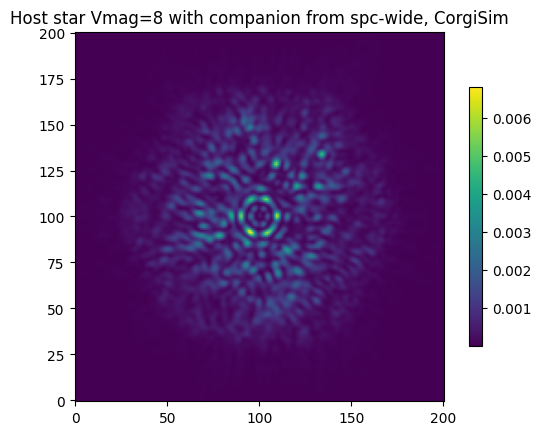

In [4]:
#plot psf
plt.imshow(image_tot_corgi, origin='lower')
plt.title('Host star Vmag=8 with companion from spc-wide, CorgiSim')
co = plt.colorbar(shrink=0.7)